In [1]:
#Import all libraries
import quandl
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [2]:
#Get the stock data
df = quandl.get("WIKI/AMZN",start_date="1997-12-5", end_date="2018-02-12")
# Take a look at the data
print(df.tail())

               Open     High      Low    Close      Volume  Ex-Dividend  \
Date                                                                      
2018-02-06  1361.46  1443.99  1351.79  1442.84  10773963.0          0.0   
2018-02-07  1449.00  1460.99  1415.15  1416.78   7066828.0          0.0   
2018-02-08  1429.67  1433.75  1349.94  1350.47   8108560.0          0.0   
2018-02-09  1373.49  1383.50  1265.93  1338.99  13787886.0          0.0   
2018-02-12  1364.67  1393.81  1344.01  1386.23   6682214.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2018-02-06          1.0    1361.46    1443.99   1351.79     1442.84   
2018-02-07          1.0    1449.00    1460.99   1415.15     1416.78   
2018-02-08          1.0    1429.67    1433.75   1349.94     1350.47   
2018-02-09          1.0    1373.49    1383.50   1265.93     1338.99   
2018-02-12          1.0    1364.67    1393.81   

In [3]:
# Get the Adjusted Close Price
df = df[['Adj. Close']]
#Take a look at the new data
print(df.tail())

            Adj. Close
Date                  
2018-02-06     1442.84
2018-02-07     1416.78
2018-02-08     1350.47
2018-02-09     1338.99
2018-02-12     1386.23


In [4]:
# A variable for predicting 'n' days out into the future
future_out = 30 #'n=30' days
#Create another column (the target or dependent variable) shifted 'n' units up
df['Prediction'] = df[['Adj. Close']].shift(-future_out)
#print the new data set
print(df.tail())

            Adj. Close  Prediction
Date                              
2018-02-06     1442.84         NaN
2018-02-07     1416.78         NaN
2018-02-08     1350.47         NaN
2018-02-09     1338.99         NaN
2018-02-12     1386.23         NaN


In [5]:
# Create the independent data set X  #
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))

#Remove the last 'n' rows
X = X[:-future_out]
print(X)

[[   4.59416667]
 [   4.70833333]
 [   4.6875    ]
 ...
 [1176.76      ]
 [1182.26      ]
 [1186.1       ]]


In [6]:
# Create the dependent data set y  #
# Convert the dataframe to a numpy array (All of the values including the NaN's)
y = np.array(df['Prediction'])
# Get all of the y values except the last 'n' rows
y = y[:-future_out]
print(y)

[   5.07333333    5.13583333    4.9375     ... 1350.47       1338.99
 1386.23      ]


In [7]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
# Create and train the Support Vector Machine (Regressor)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.9817302052003107


In [10]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.9892433317901976


In [12]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-future_out:]
print(x_forecast)

[[1169.47]
 [1189.01]
 [1204.2 ]
 [1209.59]
 [1229.14]
 [1246.87]
 [1252.7 ]
 [1254.33]
 [1276.68]
 [1305.2 ]
 [1304.86]
 [1295.  ]
 [1293.32]
 [1294.58]
 [1327.31]
 [1362.54]
 [1357.51]
 [1377.95]
 [1402.05]
 [1417.68]
 [1437.82]
 [1451.65]
 [1390.  ]
 [1431.  ]
 [1396.62]
 [1442.84]
 [1416.78]
 [1350.47]
 [1338.99]
 [1386.23]]


In [13]:
# Print linear regression model predictions for the next 'n' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

# Print support vector regressor model predictions for the next 'n' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[1225.89082252 1246.40763433 1262.35698803 1268.01643612 1288.54374784
 1307.16007708 1313.28152093 1314.99300523 1338.46028998 1368.4060153
 1368.04901858 1357.69611354 1355.93212972 1357.25511758 1391.62130236
 1428.61246306 1423.33101151 1444.79281465 1470.09758254 1486.50893201
 1507.65573804 1522.17710484 1457.44519859 1500.49480372 1464.39613484
 1512.92668969 1485.56394068 1415.93907931 1403.88518987 1453.4867349 ]
[1339.42598759 1414.25863229  591.03672387  590.51570586  590.51570242
  590.51570242  590.51570242  590.51570242  590.51570242  590.51570242
  590.51570242  590.51570242  590.51570242  590.51570242  590.51570242
  590.51570242  590.51570242  590.51570242  590.51570242  590.51570242
  590.51570242  590.51570242  590.51570242  590.51570242  590.51570242
  590.51570242  590.51570242  590.51570242  590.51570242  590.51570242]


**Now we will import AMZN data from 13th Feb-2018 to 27th Mar-2019 TO compare our predicted values**

In [14]:
new_df = quandl.get("WIKI/AMZN",start_date='2018-02-13',end_date='2018-03-27')

new_df.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,1586.45,1590.00,1563.17,1581.86,4667291.0,0.0,1.0,1586.45,1590.00,1563.17,1581.86,4667291.0
2018-03-22,1565.47,1573.85,1542.40,1544.10,6177737.0,0.0,1.0,1565.47,1573.85,1542.40,1544.10,6177737.0
2018-03-23,1539.01,1549.02,1495.36,1495.56,7843966.0,0.0,1.0,1539.01,1549.02,1495.36,1495.56,7843966.0
2018-03-26,1530.00,1556.99,1499.25,1555.86,5547618.0,0.0,1.0,1530.00,1556.99,1499.25,1555.86,5547618.0
2018-03-27,1572.40,1575.96,1482.32,1497.05,6793279.0,0.0,1.0,1572.40,1575.96,1482.32,1497.05,6793279.0


In [15]:
len(new_df)

30

In [16]:
new_df.to_excel('amzn.xlsx')

In [17]:
import pandas as pd

In [ ]:
#Sve the file as excel

In [18]:
amzn_actual = pd.read_excel('amzn.xlsx')

In [19]:
amzn_actual = amzn_actual[['Adj. Close']]

In [20]:
amzn_actual

,Adj. Close
0,1414.51
1,1451.05
2,1461.76
3,1448.69
4,1468.35
5,1482.92
6,1484.76
7,1500.00
8,1521.95
9,1511.98


In [21]:
import matplotlib.pyplot as plt

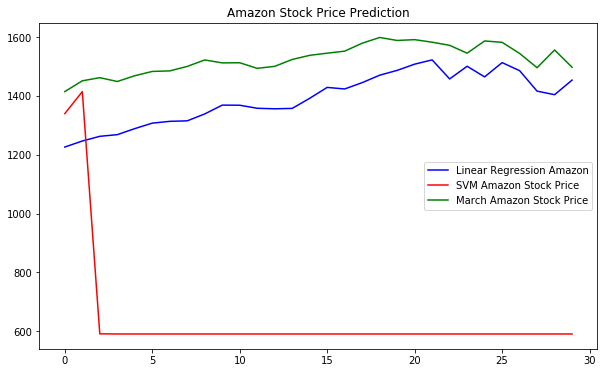

In [25]:
plt.figure(figsize=(10,6))
plt.plot(lr_prediction, color='blue', label='Linear Regression Amazon')
plt.plot(svm_prediction, color='red', label='SVM Amazon Stock Price')
plt.plot(amzn_actual , color='green', label='March Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.legend()
plt.show()

### Findings

**Here we can notice that even though linear regression and svm had almost the same confidence score , linear regression proved to be the better model between the two.**